<a href="https://colab.research.google.com/github/everythingapplejj/Research-Graph-Embeddings-/blob/JJ/mcmc_samples_with_Data_cleaning_beta_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# this program is with the pre_data cleaning :)
# Duplicated nodes from the node_list and adj_matrix will be removed

In [2]:
print("Welcome to Graph Embeddings!")

Welcome to Graph Embeddings!


In [49]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#testing visualization
#Implementation by Jiwoong Jung
import torch

#placeholder values:

# Print information about the dataset


# Visualization
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 24})
from torch_geometric.utils import to_networkx
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
"""
Created on Wed Aug 23 12:22:38 2023

@author: vishalr
"""

# we can use the node labels for the first set of the x values
# figure out ways to include diff files for the y_features (1st priority)
# for now, do the y label first,
# later consider the edge features and node features

import pandas as pd
import pickle
import numpy as np


#change this to the folder where you store your data
data_dir = ""

#each of the two data frames below have 20,000 rows, each corresponding to one sample from the original graph
#each sample consists of 21 nodes; node_labels contains the names of these 21 nodes of the form Vxyz
#each node is a DNA fragment of length 500 bases; so Vxyz coveres region [500*xyz, 500*xyz+500)
#adjacency_matrix has the flattended adjacecny matrix for each of these 20,000 samples
#so each row is of dimension 21*21 = 441


#node_labels = np.load(data_dir+'df_chr2R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')

#adjacency_matrix = np.load(data_dir+'df_chr2R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

worklist_node_labels = []
worklist_adjacency_matrix = []

#importing the rest of the files
# 2L = 0; 2R = 1; 3L = 2, 3R = 3

node_labels_2L = np.load(data_dir+'df_chr2L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_2L = np.load(data_dir+'df_chr2L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

worklist_node_labels.append(node_labels_2L)
worklist_adjacency_matrix.append(adjacency_matrix_2L)

node_labels_2R = np.load(data_dir+'df_chr2R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_2R = np.load(data_dir+'df_chr2R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

worklist_node_labels.append(node_labels_2R)
worklist_adjacency_matrix.append(adjacency_matrix_2R)

node_labels_3L = np.load(data_dir+'df_chr3L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_3L = np.load(data_dir+'df_chr3L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

worklist_node_labels.append(node_labels_3L)
worklist_adjacency_matrix.append(adjacency_matrix_3L)

node_labels_3R = np.load(data_dir+'df_chr3R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_3R = np.load(data_dir+'df_chr3R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')


worklist_node_labels.append(node_labels_3R)
worklist_adjacency_matrix.append(adjacency_matrix_3R)

In [50]:
import numpy as np
print(worklist_node_labels)

[array([[ 5997, 19835,   969, ...,  4455, 27017, 27025],
       [41207, 22040, 41207, ...,   135,   186,   153],
       [13615, 16412, 16377, ..., 41754, 41780, 41767],
       ...,
       [39599,  9995, 38842, ..., 33868, 20856, 14348],
       [39954,  9995, 10131, ...,  2117,  2259,  2251],
       [32509, 19793, 19783, ...,  7313, 42107, 41499]]), array([[34307, 23565,  5042, ...,  5114, 12844, 12993],
       [36450, 36179, 36450, ..., 22359, 28058, 30979],
       [36450, 36179, 33947, ...,  9673, 20209, 12537],
       ...,
       [ 7427, 39513, 19626, ..., 25109, 25119, 27062],
       [33656, 20125, 24230, ..., 28043, 29127, 29091],
       [ 8127, 38554,  7700, ..., 24445, 25489,  3057]]), array([[41331,  1284,  1255, ..., 32082, 18737, 18660],
       [ 1284,  1349,  1363, ...,  3939,  5692, 17395],
       [24386,  5147, 32020, ..., 28096,  6446, 41308],
       ...,
       [ 3375, 19321,  1419, ..., 17371, 28421, 17371],
       [44210,  1306,  3592, ..., 11490,  1774, 35930],
       

In [51]:
print(worklist_adjacency_matrix)

[array([[ 0.,  1.,  1., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  1., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  1., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0.

In [52]:
for i in range(0,len(worklist_adjacency_matrix)):
  worklist_adjacency_matrix[i] = worklist_adjacency_matrix[i][:,:-1]
#adjacency_matrix = adjacency_matrix[:,:-1]

In [53]:
print(worklist_adjacency_matrix)

[array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]]), array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.]]), array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]]), array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.]])]


In [54]:
# proceeding with data cleaning:
import numpy as np
def remove_duplicates(node_labels, adj_matrix):
  sample_nodes = node_labels
  sample_adj_matrix = adj_matrix
  i = 0
  j = i + 1
  while(i < len(sample_nodes) - 1):
    if(sample_nodes[i] == sample_nodes[j]):
      sample_nodes = np.delete(sample_nodes,j)
      sample_adj_matrix = np.delete(np.delete(sample_adj_matrix, j, 0), j, 1)
      if(j >= len(sample_nodes)):
        i = i + 1
        j = i + 1
      continue
    else:
      j = j + 1
      if(j >= len(sample_nodes)):
        i = i + 1
        j = i + 1
  return sample_nodes, sample_adj_matrix

In [55]:
#next

In [56]:
#placeholder logics

import torch
from torch_geometric.data import Data, InMemoryDataset
from torch_geometric.utils import from_scipy_sparse_matrix
import scipy.sparse as sp
import numpy as np

class MyCustomDataset(InMemoryDataset):
    def __init__(self, data_list, transform=None, pre_transform=None):
        self.data_list = data_list
        super(MyCustomDataset, self).__init__(None, transform, pre_transform)
        self.data, self.slices = self.collate(data_list)

    @property
    def raw_file_names(self):
        return []

    @property
    def processed_file_names(self):
        return []

    def download(self):
        pass

    def process(self):
        pass

    def len(self):
        return len(self.data_list)

    def get(self, idx):
        return self.data_list[idx]

#where can I consider the node_features?
dataset = []
#worklist_edge_attr = []
#y = np.array([1])
#y = torch.from_numpy(y).type(torch.LongTensor)
counter = 0
label_number = 0
edge_placeholder = 0;
for adjacency_matrix in worklist_adjacency_matrix:
  y = np.array([label_number])
  y = torch.from_numpy(y).type(torch.LongTensor)
  for graph in adjacency_matrix:
    sample_graph = graph.reshape(21, 21) # fix the reshaping
    sample_node = worklist_node_labels[label_number][counter]
    sample_node, sample_graph = remove_duplicates(sample_node, sample_graph)
    #node_indices = torch.arange(sample.shape[0], dtype=torch.float).view(-1, 1)
    sample_node_labels = torch.from_numpy(sample_node).type(torch.LongTensor).view(-1,1) #change this node_label
    #print(sample_node_labels)
    #x = node_indices #testing...
    x = sample_node_labels
    #print(y) # testing to see if the labels work
    adj_matrix = sp.coo_matrix(sample_graph)
    edge_index, edge_attr = from_scipy_sparse_matrix(adj_matrix)
    edge_placeholder = edge_attr
    #worklist_edge_attr.append(edge_attr)
    #y = torch.from_numpy(node_labels[counter]).type(torch.LongTensor)
    data = Data(x=x, edge_index=edge_index, y = y)
    dataset.append(data)
    counter = counter + 1
  counter = 0
  label_number = label_number + 1

dataset = MyCustomDataset(dataset).shuffle()

# Example: Accessing the first graph in the custom dataset
print(dataset[20000])
print("Number of Nodes (x):")
print(dataset[0].x)
# the node features are vacant for now
print("Edge index:")
print(dataset[0].edge_index)
print("Labels (y):")
print(dataset.y)
print(len(dataset))

Processing...
Done!


Data(x=[18, 1], edge_index=[2, 34], y=[1])
Number of Nodes (x):
tensor([[27406],
        [12838],
        [15556],
        [20497],
        [ 8130],
        [11843],
        [11825],
        [11903],
        [ 5761],
        [10807],
        [11790],
        [ 6555],
        [ 6441],
        [33247],
        [17929],
        [ 6501],
        [11165]])
Edge index:
tensor([[ 0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  5,  5,  5,  5,  6,  6,  6,
          6,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9, 10, 10, 10, 10, 11, 11, 12,
         12, 12, 12, 13, 13, 14, 14, 15, 15, 16],
        [ 1,  0,  2,  1,  3,  2,  4,  3,  5,  4,  6,  7,  8, 10, 11,  5,  7,  8,
         10,  5,  6,  8, 10,  5,  6,  7,  9, 10,  8,  5,  6,  7,  8,  5, 12, 11,
         13, 14, 15, 12, 14, 12, 13, 12, 16, 15]])
Labels (y):
tensor([1, 1, 0,  ..., 1, 1, 0])
80000


In [57]:
print(f'Sample Edge_Attr: {edge_placeholder}') #every Edge_Attr is 1 for now.?

Sample Edge_Attr: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       dtype=torch.float64)


In [58]:
print(dataset[20000])
print(dataset[0])
print(dataset[10000])
print(dataset[70000])
print(dataset[len(dataset) - 1])

Data(x=[18, 1], edge_index=[2, 34], y=[1])
Data(x=[17, 1], edge_index=[2, 46], y=[1])
Data(x=[18, 1], edge_index=[2, 40], y=[1])
Data(x=[18, 1], edge_index=[2, 38], y=[1])
Data(x=[18, 1], edge_index=[2, 54], y=[1])


In [59]:
#testing the visualization of the graph

def graph_visuals(data_input):
  G = to_networkx(data_input, to_undirected=True)

# 3D spring layout
  pos = nx.spring_layout(G, dim=3, seed=0)

# Extract node and edge positions from the layout
  node_xyz = np.array([pos[v] for v in sorted(G)])
  edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

# Create the 3D figure
  fig = plt.figure(figsize=(16,16))
  ax = fig.add_subplot(111, projection="3d")

# Suppress tick labels
  for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
      dim.set_ticks([])

# Plot the nodes - alpha is scaled by "depth" automatically
  ax.scatter(*node_xyz.T, s=500, c="#0A047A")

# Plot the edges
  for vizedge in edge_xyz:
      ax.plot(*vizedge.T, color="tab:gray")

# fig.tight_layout()
  plt.show()



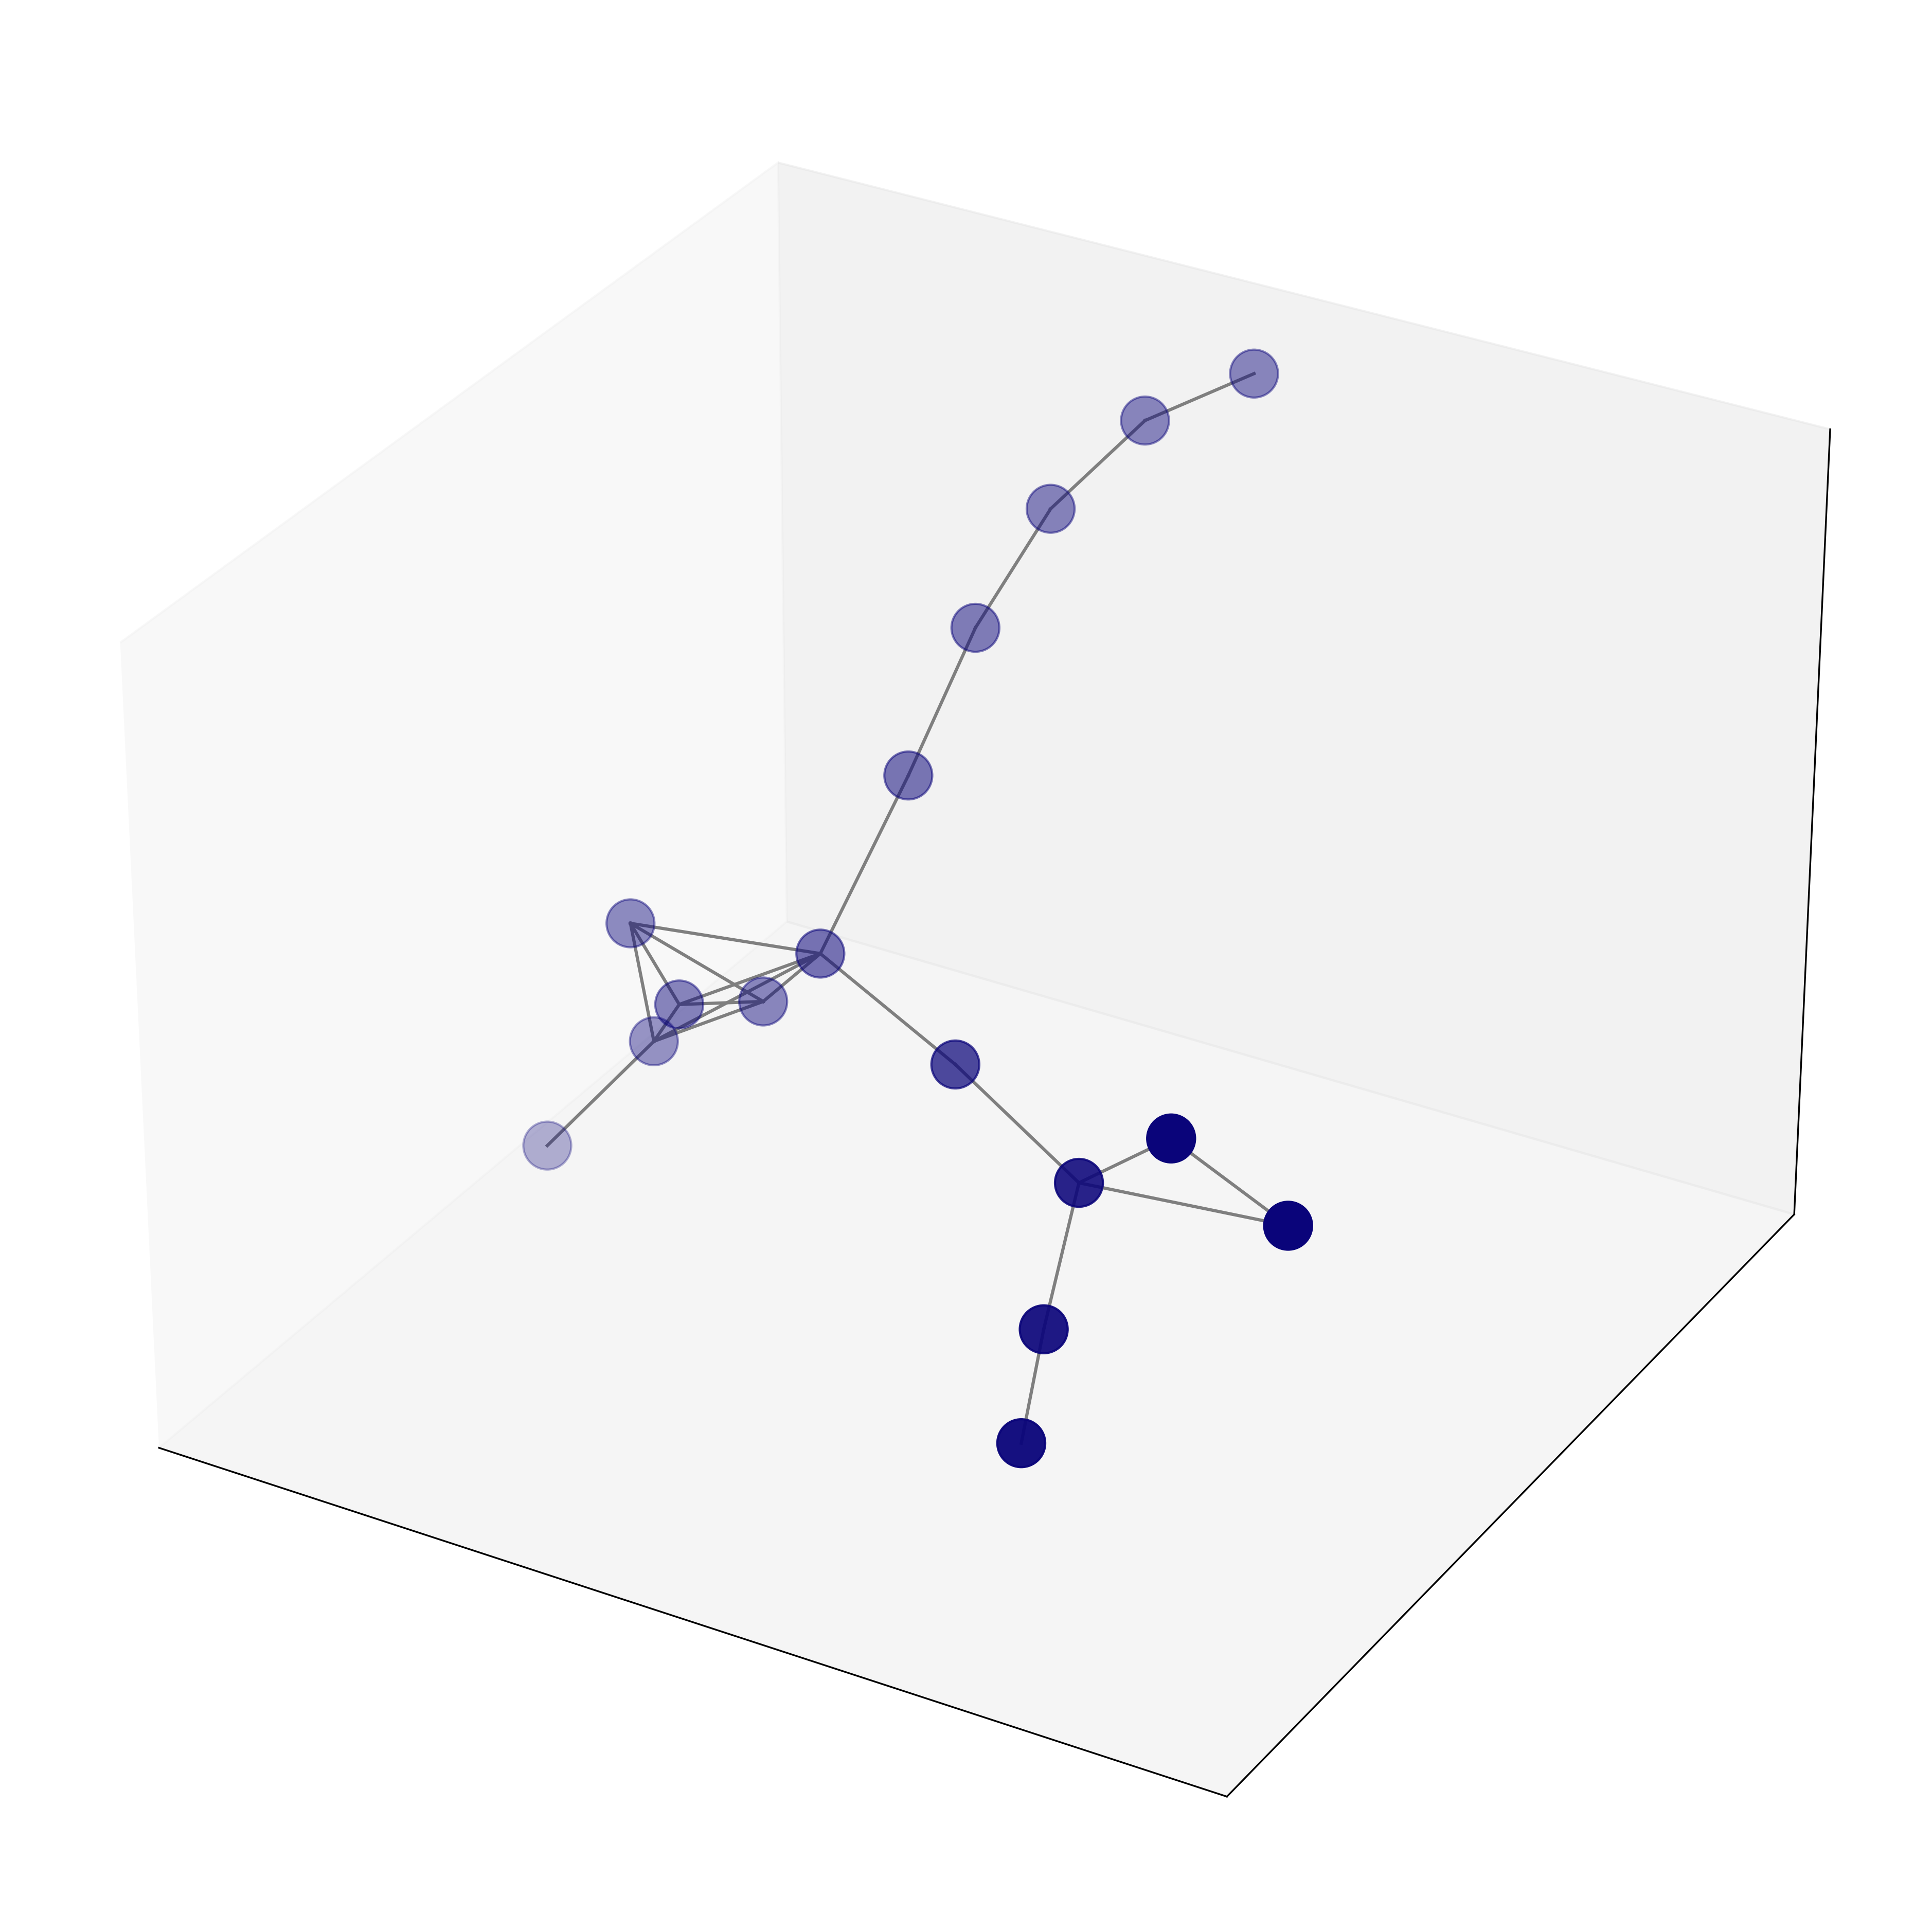

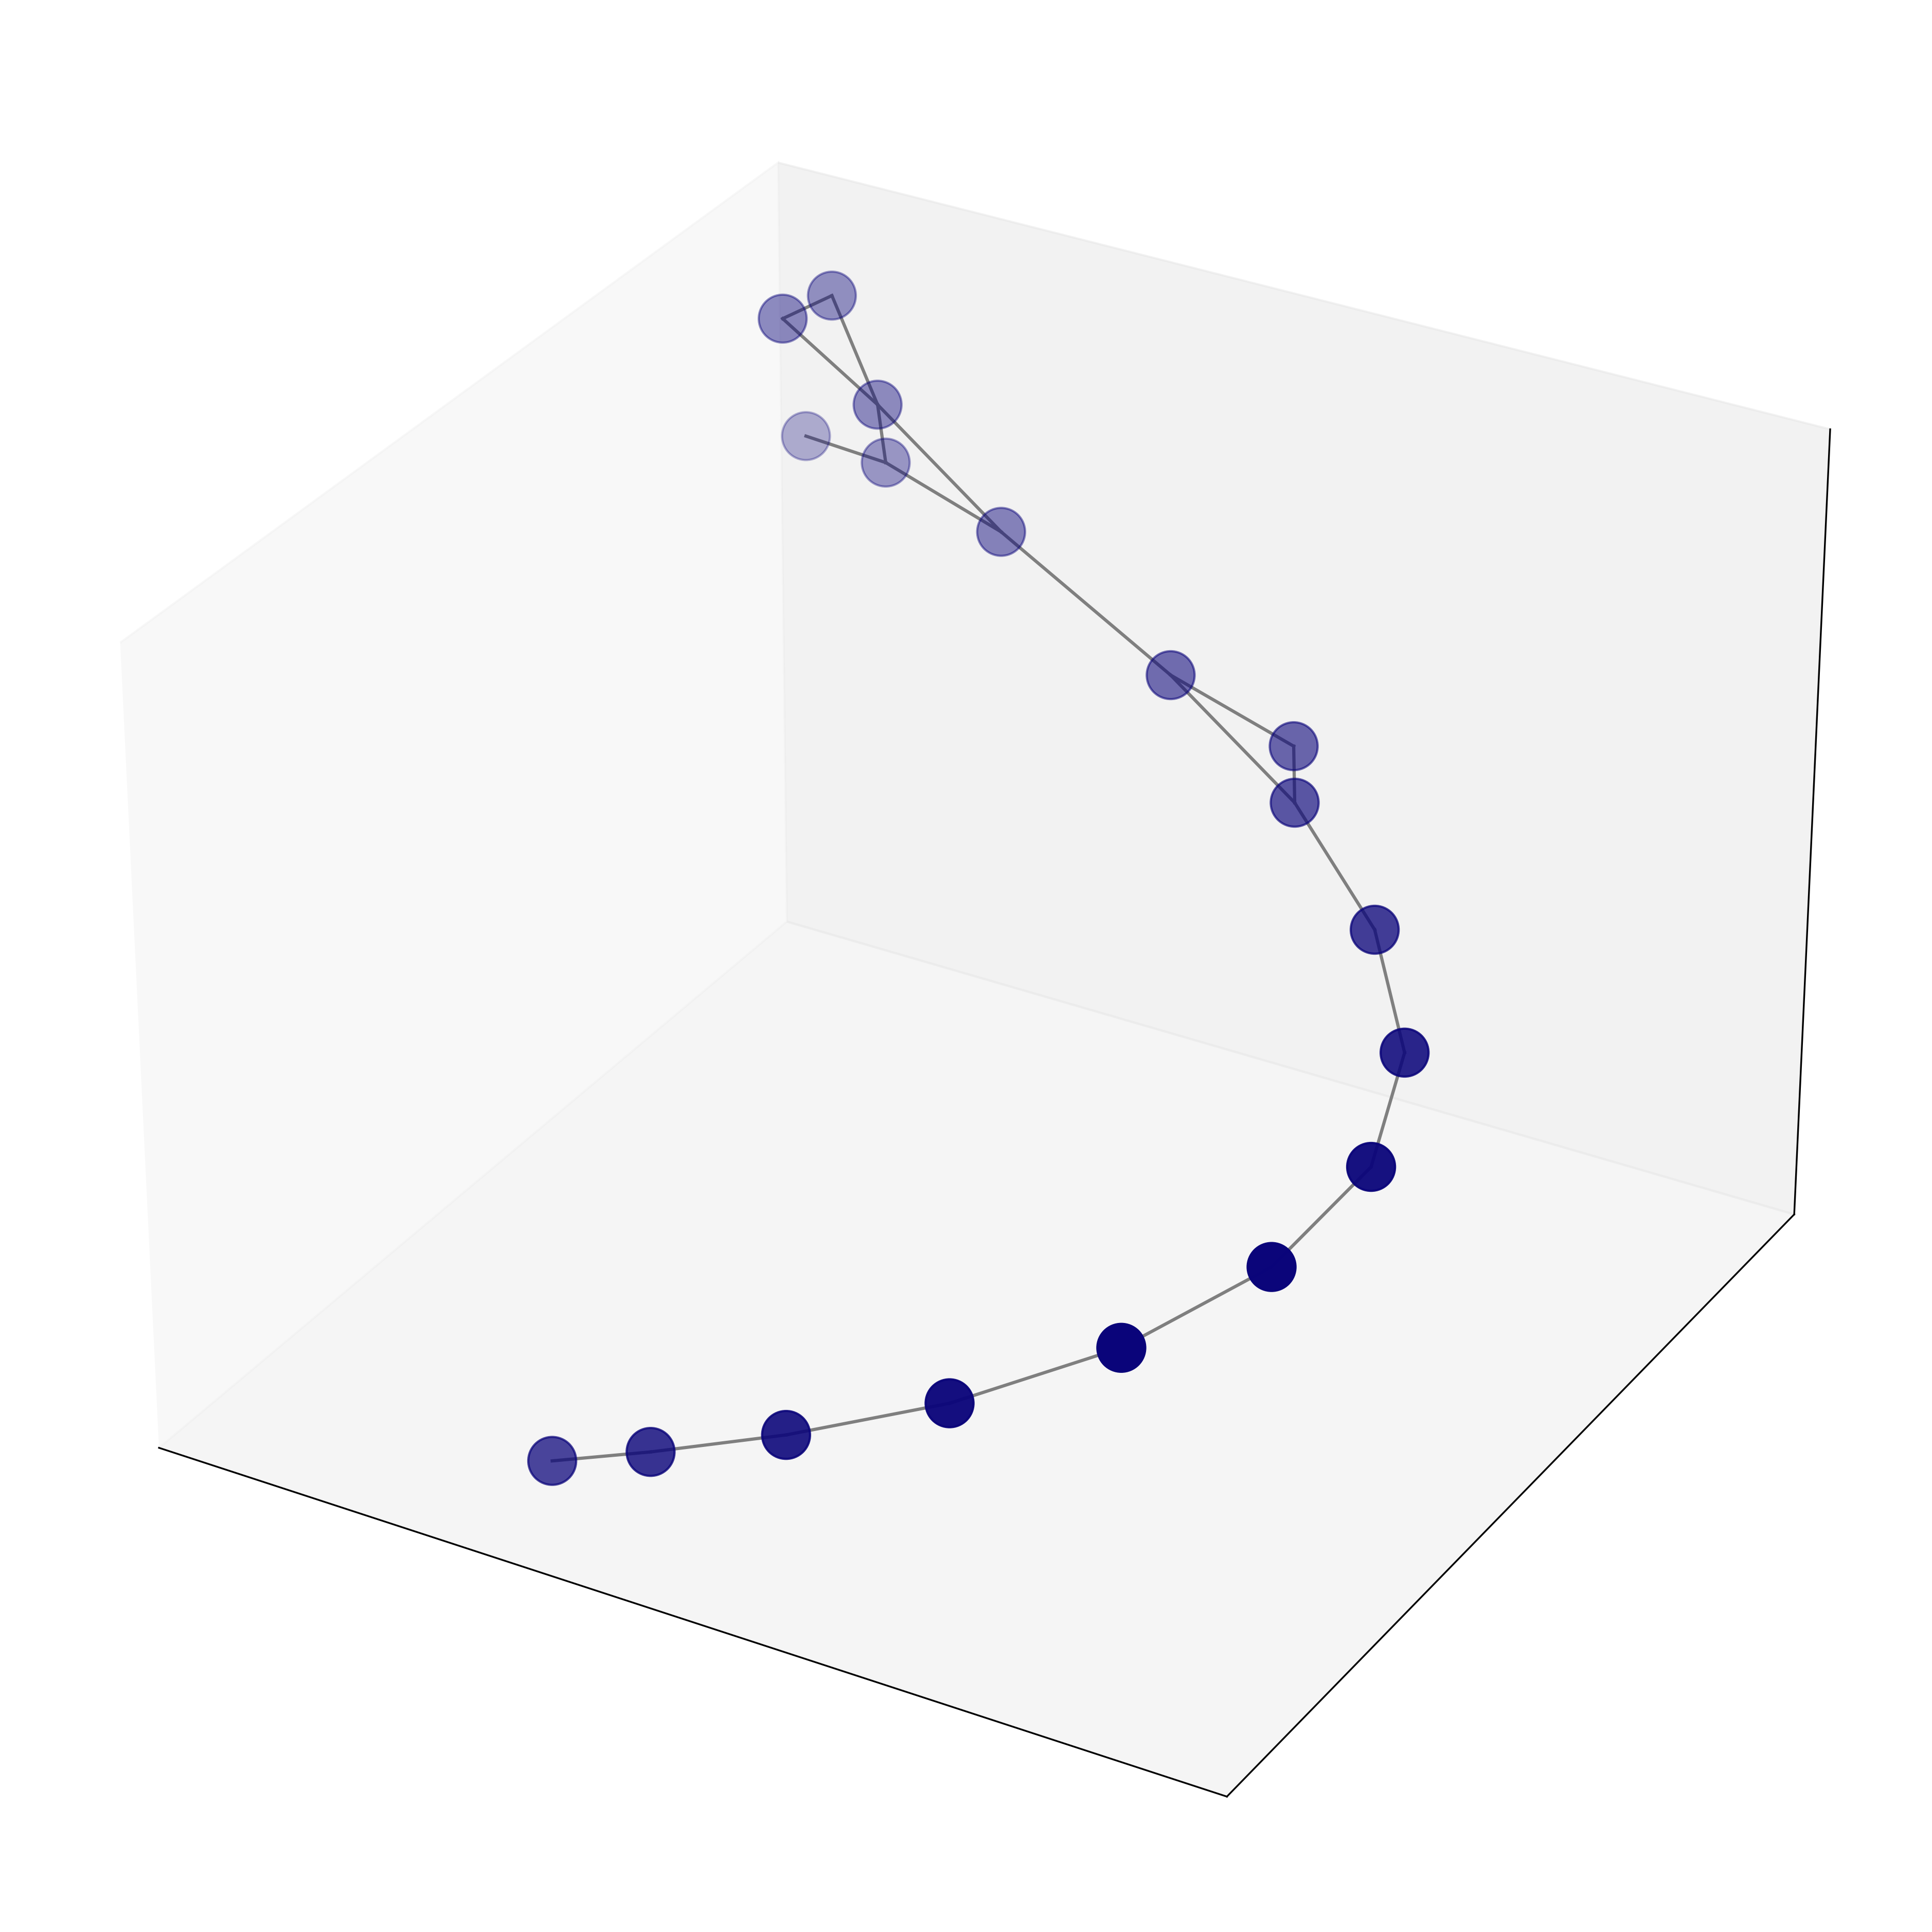

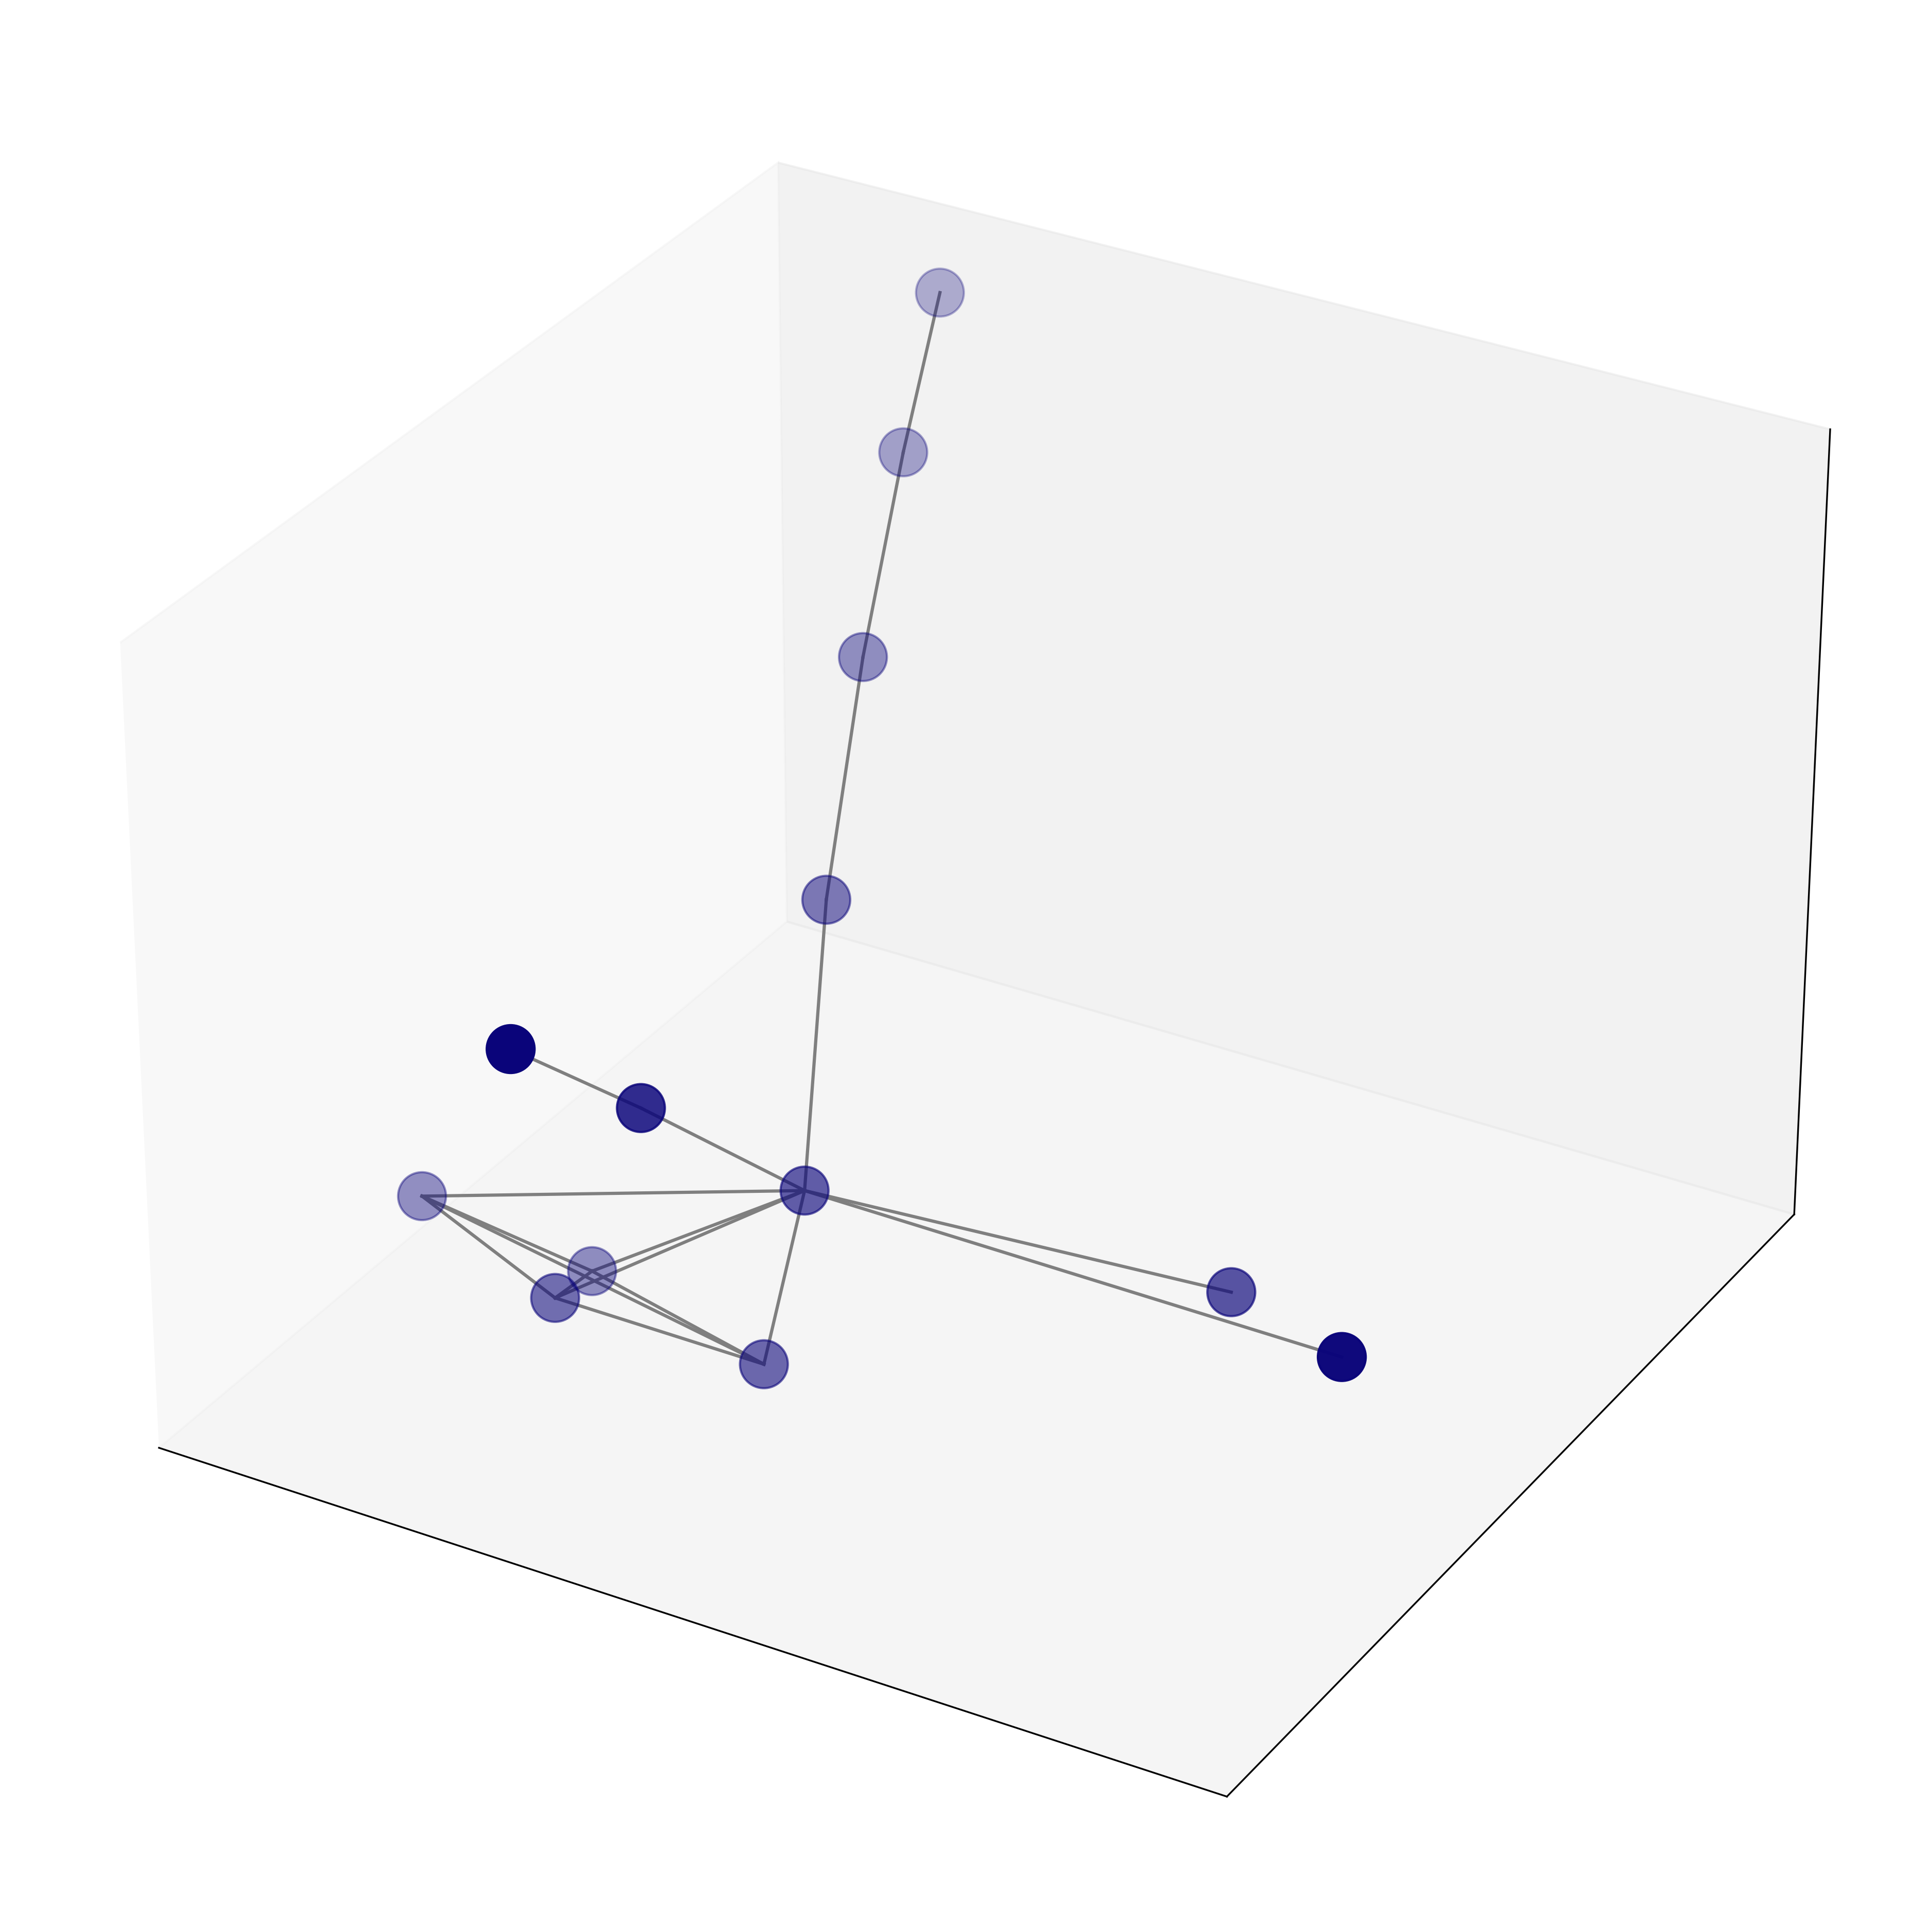

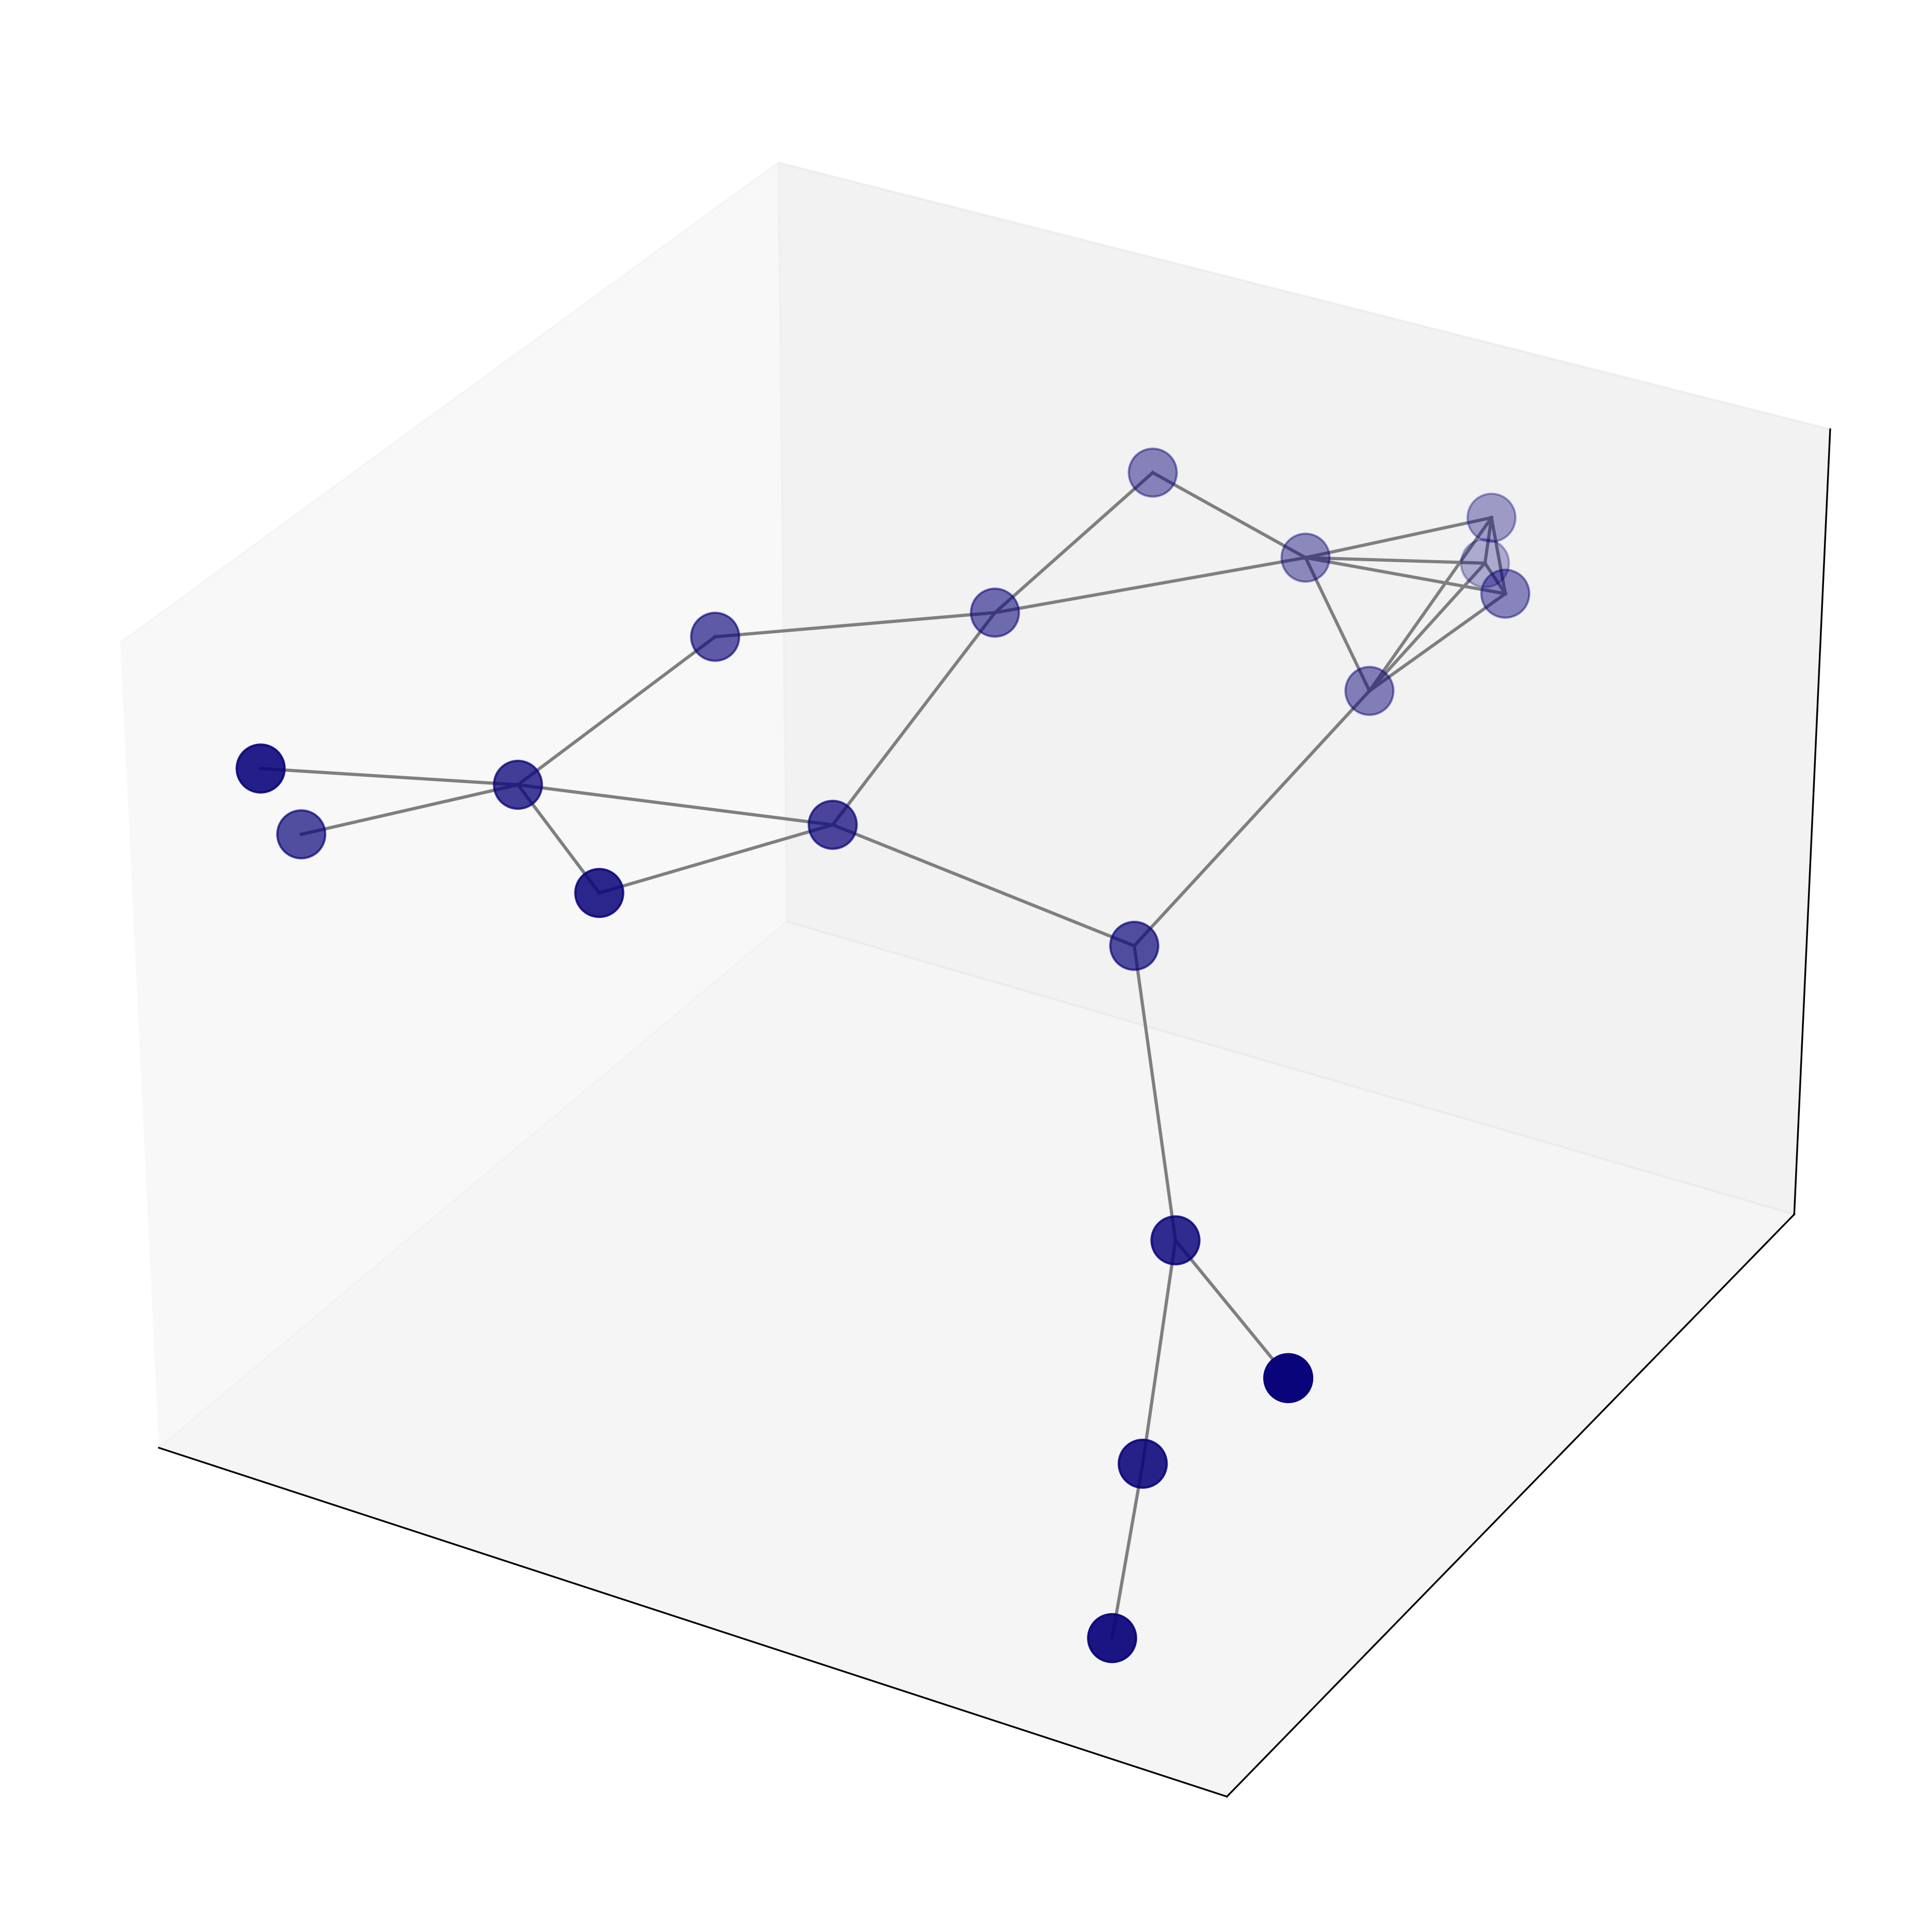

In [60]:
graph_visuals(dataset[0])
graph_visuals(dataset[10000])
graph_visuals(dataset[70023])
graph_visuals(dataset[len(dataset) - 1])

In [62]:
#embeddings testing

import torch
import torch.nn.functional as F
from torch.nn import Sequential, Linear, ReLU, BatchNorm1d
from torch_geometric.nn import GINConv, global_add_pool
import matplotlib.pyplot as plt


class GIN(torch.nn.Module):
    """GIN"""
    def __init__(self, dim_h, output_dim=2):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(dataset.num_node_features, dim_h),
                       BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.lin1 = Linear(dim_h*3, dim_h*3)
        self.lin2 = Linear(dim_h*3, output_dim)

    def forward(self, x, edge_index, batch):
        # Node embeddings
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        # Graph-level readout
        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        # Concatenate graph embeddings
        h = torch.cat((h1, h2, h3), dim=1)

        # Classifier
        h = self.lin1(h)
        h = h.relu()
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)

        return h  # Return the embeddings directly

# Assume model is already trained and dataset is prepared
model = GIN(dim_h=32, output_dim=2)
model.eval()

# Store embeddings and labels
#embeddings_list = []
#labels_list = []

# Iterate through the dataset

counter = 0

selected = []

for data in dataset:
    new_x = data.x
    new_y = data.y
    reference_graph = np.zeros((len(data.x), len(data.x)))
    for i in range(0, reference_graph.shape[0]):
      for j in range(0, reference_graph.shape[1]):
        if (abs(i - j) == 1):
          reference_graph[i][j] = 1
    #print(reference_graph)
    #print(reference_graph.shape)
    reference_adj = sp.coo_matrix(reference_graph)
    edge_index, edge_attr = from_scipy_sparse_matrix(reference_adj)
    data_reference = Data(x = new_x, edge_index = edge_index, y = new_y)
    with torch.no_grad():
        out = model(data.x, data.edge_index, data.batch)
        reference_out = model(data_reference.x, data_reference.edge_index, data.batch)
    '''
    embeddings_list.append(out.numpy())
    embeddings_list.append(reference_out.numpy())
    labels_list.append(data.y.numpy())
    labels_list.append(data_reference.y.numpy())
    '''
    out_tensor = out.detach()
    reference_out_tensor = reference_out.detach()
    e_dis = torch.norm(out_tensor - reference_out_tensor)
    if(e_dis >= 5000):
      selected.append(data)
    else:
      continue

dataset = selected
# Convert lists to NumPy arrays

'''
embeddings = np.array(embeddings_list)
labels = np.array(labels_list)

plt.figure(figsize=(10, 10))
scatter = plt.scatter(embeddings[:, 0, 0], embeddings[:, 0, 1], c=labels[:, 0], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Class Labels')
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
plt.title('Graph Embeddings in 2D Space')
plt.show()
'''

"\nembeddings = np.array(embeddings_list)\nlabels = np.array(labels_list)\n\nplt.figure(figsize=(10, 10))\nscatter = plt.scatter(embeddings[:, 0, 0], embeddings[:, 0, 1], c=labels[:, 0], cmap='viridis', alpha=0.7)\nplt.colorbar(scatter, label='Class Labels')\nplt.xlabel('Embedding Dimension 1')\nplt.ylabel('Embedding Dimension 2')\nplt.title('Graph Embeddings in 2D Space')\nplt.show()\n"

In [66]:
print(len(dataset))
dataset = MyCustomDataset(dataset).shuffle()


4439


Processing...
Done!


In [67]:
from torch_geometric.loader import DataLoader
# Create training, validation, and test sets
print(dataset[10])
train_dataset = dataset[:int(len(dataset)*0.8)]
val_dataset   = dataset[int(len(dataset)*0.8):int(len(dataset)*0.9)]
test_dataset  = dataset[int(len(dataset)*0.9):]

print(f'Training set   = {len(train_dataset)} graphs')
print(f'Validation set = {len(val_dataset)} graphs')
print(f'Test set       = {len(test_dataset)} graphs')

# Create mini-batches
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print('\nTrain loader:')
for i, subgraph in enumerate(train_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nValidation loader:')
for i, subgraph in enumerate(val_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nTest loader:')
for i, subgraph in enumerate(test_loader):
    print(f' - Subgraph {i}: {subgraph}')

Data(x=[13, 1], edge_index=[2, 30], y=[1])
Training set   = 3551 graphs
Validation set = 444 graphs
Test set       = 444 graphs

Train loader:
 - Subgraph 0: DataBatch(x=[1035, 1], edge_index=[2, 2672], y=[64], batch=[1035], ptr=[65])
 - Subgraph 1: DataBatch(x=[1018, 1], edge_index=[2, 2572], y=[64], batch=[1018], ptr=[65])
 - Subgraph 2: DataBatch(x=[1031, 1], edge_index=[2, 2584], y=[64], batch=[1031], ptr=[65])
 - Subgraph 3: DataBatch(x=[1031, 1], edge_index=[2, 2616], y=[64], batch=[1031], ptr=[65])
 - Subgraph 4: DataBatch(x=[1029, 1], edge_index=[2, 2628], y=[64], batch=[1029], ptr=[65])
 - Subgraph 5: DataBatch(x=[1014, 1], edge_index=[2, 2540], y=[64], batch=[1014], ptr=[65])
 - Subgraph 6: DataBatch(x=[1032, 1], edge_index=[2, 2636], y=[64], batch=[1032], ptr=[65])
 - Subgraph 7: DataBatch(x=[1019, 1], edge_index=[2, 2594], y=[64], batch=[1019], ptr=[65])
 - Subgraph 8: DataBatch(x=[1043, 1], edge_index=[2, 2674], y=[64], batch=[1043], ptr=[65])
 - Subgraph 9: DataBatch(x=[1

In [68]:
import torch
import torch.nn.functional as F
from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
from torch_geometric.nn import GCNConv, GINConv
from torch_geometric.nn import global_mean_pool, global_add_pool


class GCN(torch.nn.Module):
    """GCN"""
    def __init__(self, dim_h):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, dim_h)
        self.conv2 = GCNConv(dim_h, dim_h)
        self.conv3 = GCNConv(dim_h, dim_h)
        self.lin = Linear(dim_h, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        # Node embeddings
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = self.conv2(h, edge_index)
        h = h.relu()
        h = self.conv3(h, edge_index)

        # Graph-level readout
        hG = global_mean_pool(h, batch)

        # Classifier
        h = F.dropout(hG, p=0.5, training=self.training)
        h = self.lin(h)

        return hG, F.log_softmax(h, dim=1)

class GIN(torch.nn.Module):
    """GIN"""
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(dataset.num_node_features, dim_h),
                       BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.lin1 = Linear(dim_h*3, dim_h*3)
        self.lin2 = Linear(dim_h*3, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        # Node embeddings
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        # Graph-level readout
        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        # Concatenate graph embeddings
        h = torch.cat((h1, h2, h3), dim=1)

        # Classifier
        h = self.lin1(h)
        h = h.relu()
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)

        return h, F.log_softmax(h, dim=1)

#gcn = GCN(dim_h=32)
gin = GIN(dim_h=32)

In [70]:

def train(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),
                                      lr=0.01,
                                      weight_decay=0.01)
    epochs = 100

    model.train()
    for epoch in range(epochs+1):
        #print(epoch)
        total_loss = 0
        acc = 0
        val_loss = 0
        val_acc = 0

        # Train on batches
        for data in loader:
          optimizer.zero_grad()
          _, out = model(data.x, data.edge_index, data.batch)
          loss = criterion(out, data.y)
          total_loss += loss / len(loader)
          acc += accuracy(out.argmax(dim=1), data.y) / len(loader)
          loss.backward()
          optimizer.step()

          # Validation
          val_loss, val_acc = test(model, val_loader)

          # print per epoch to see if the accuracy goes up!
        print(f'Epoch {epoch:>0} | Train Loss: {total_loss:.2f} '
            f'| Train Acc: {acc*100:>5.2f}% '
            f'| Val Loss: {val_loss:.2f} '
            f'| Val Acc: {val_acc*100:.2f}%')


    test_loss, test_acc = test(model, test_loader)
    print(f'Test Loss: {test_loss:.2f} | Test Acc: {test_acc*100:.2f}%')

    return model

@torch.no_grad()
def test(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    model.eval()
    loss = 0
    acc = 0

    for data in loader:
        _, out = model(data.x, data.edge_index, data.batch)
        loss += criterion(out, data.y) / len(loader)
        acc += accuracy(out.argmax(dim=1), data.y) / len(loader)

    return loss, acc

def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

#gcn = train(gcn, train_loader)
gin = train(gin, train_loader)

Epoch 0 | Train Loss: 1.08 | Train Acc: 52.13% | Val Loss: 1.07 | Val Acc: 51.06%
Epoch 1 | Train Loss: 1.04 | Train Acc: 54.52% | Val Loss: 1.01 | Val Acc: 54.32%
Epoch 2 | Train Loss: 1.03 | Train Acc: 54.05% | Val Loss: 1.02 | Val Acc: 53.15%
Epoch 3 | Train Loss: 1.04 | Train Acc: 53.91% | Val Loss: 1.00 | Val Acc: 53.59%
Epoch 4 | Train Loss: 1.03 | Train Acc: 53.82% | Val Loss: 1.00 | Val Acc: 55.21%
Epoch 5 | Train Loss: 1.04 | Train Acc: 53.43% | Val Loss: 1.00 | Val Acc: 54.96%
Epoch 6 | Train Loss: 1.01 | Train Acc: 54.97% | Val Loss: 1.02 | Val Acc: 52.02%
Epoch 7 | Train Loss: 1.00 | Train Acc: 55.17% | Val Loss: 1.00 | Val Acc: 55.21%
Epoch 8 | Train Loss: 1.01 | Train Acc: 55.47% | Val Loss: 1.02 | Val Acc: 54.52%
Epoch 9 | Train Loss: 1.00 | Train Acc: 55.30% | Val Loss: 0.99 | Val Acc: 54.55%
Epoch 10 | Train Loss: 1.00 | Train Acc: 56.08% | Val Loss: 1.04 | Val Acc: 50.95%
Epoch 11 | Train Loss: 1.00 | Train Acc: 54.94% | Val Loss: 0.99 | Val Acc: 56.46%
Epoch 12 | Tra

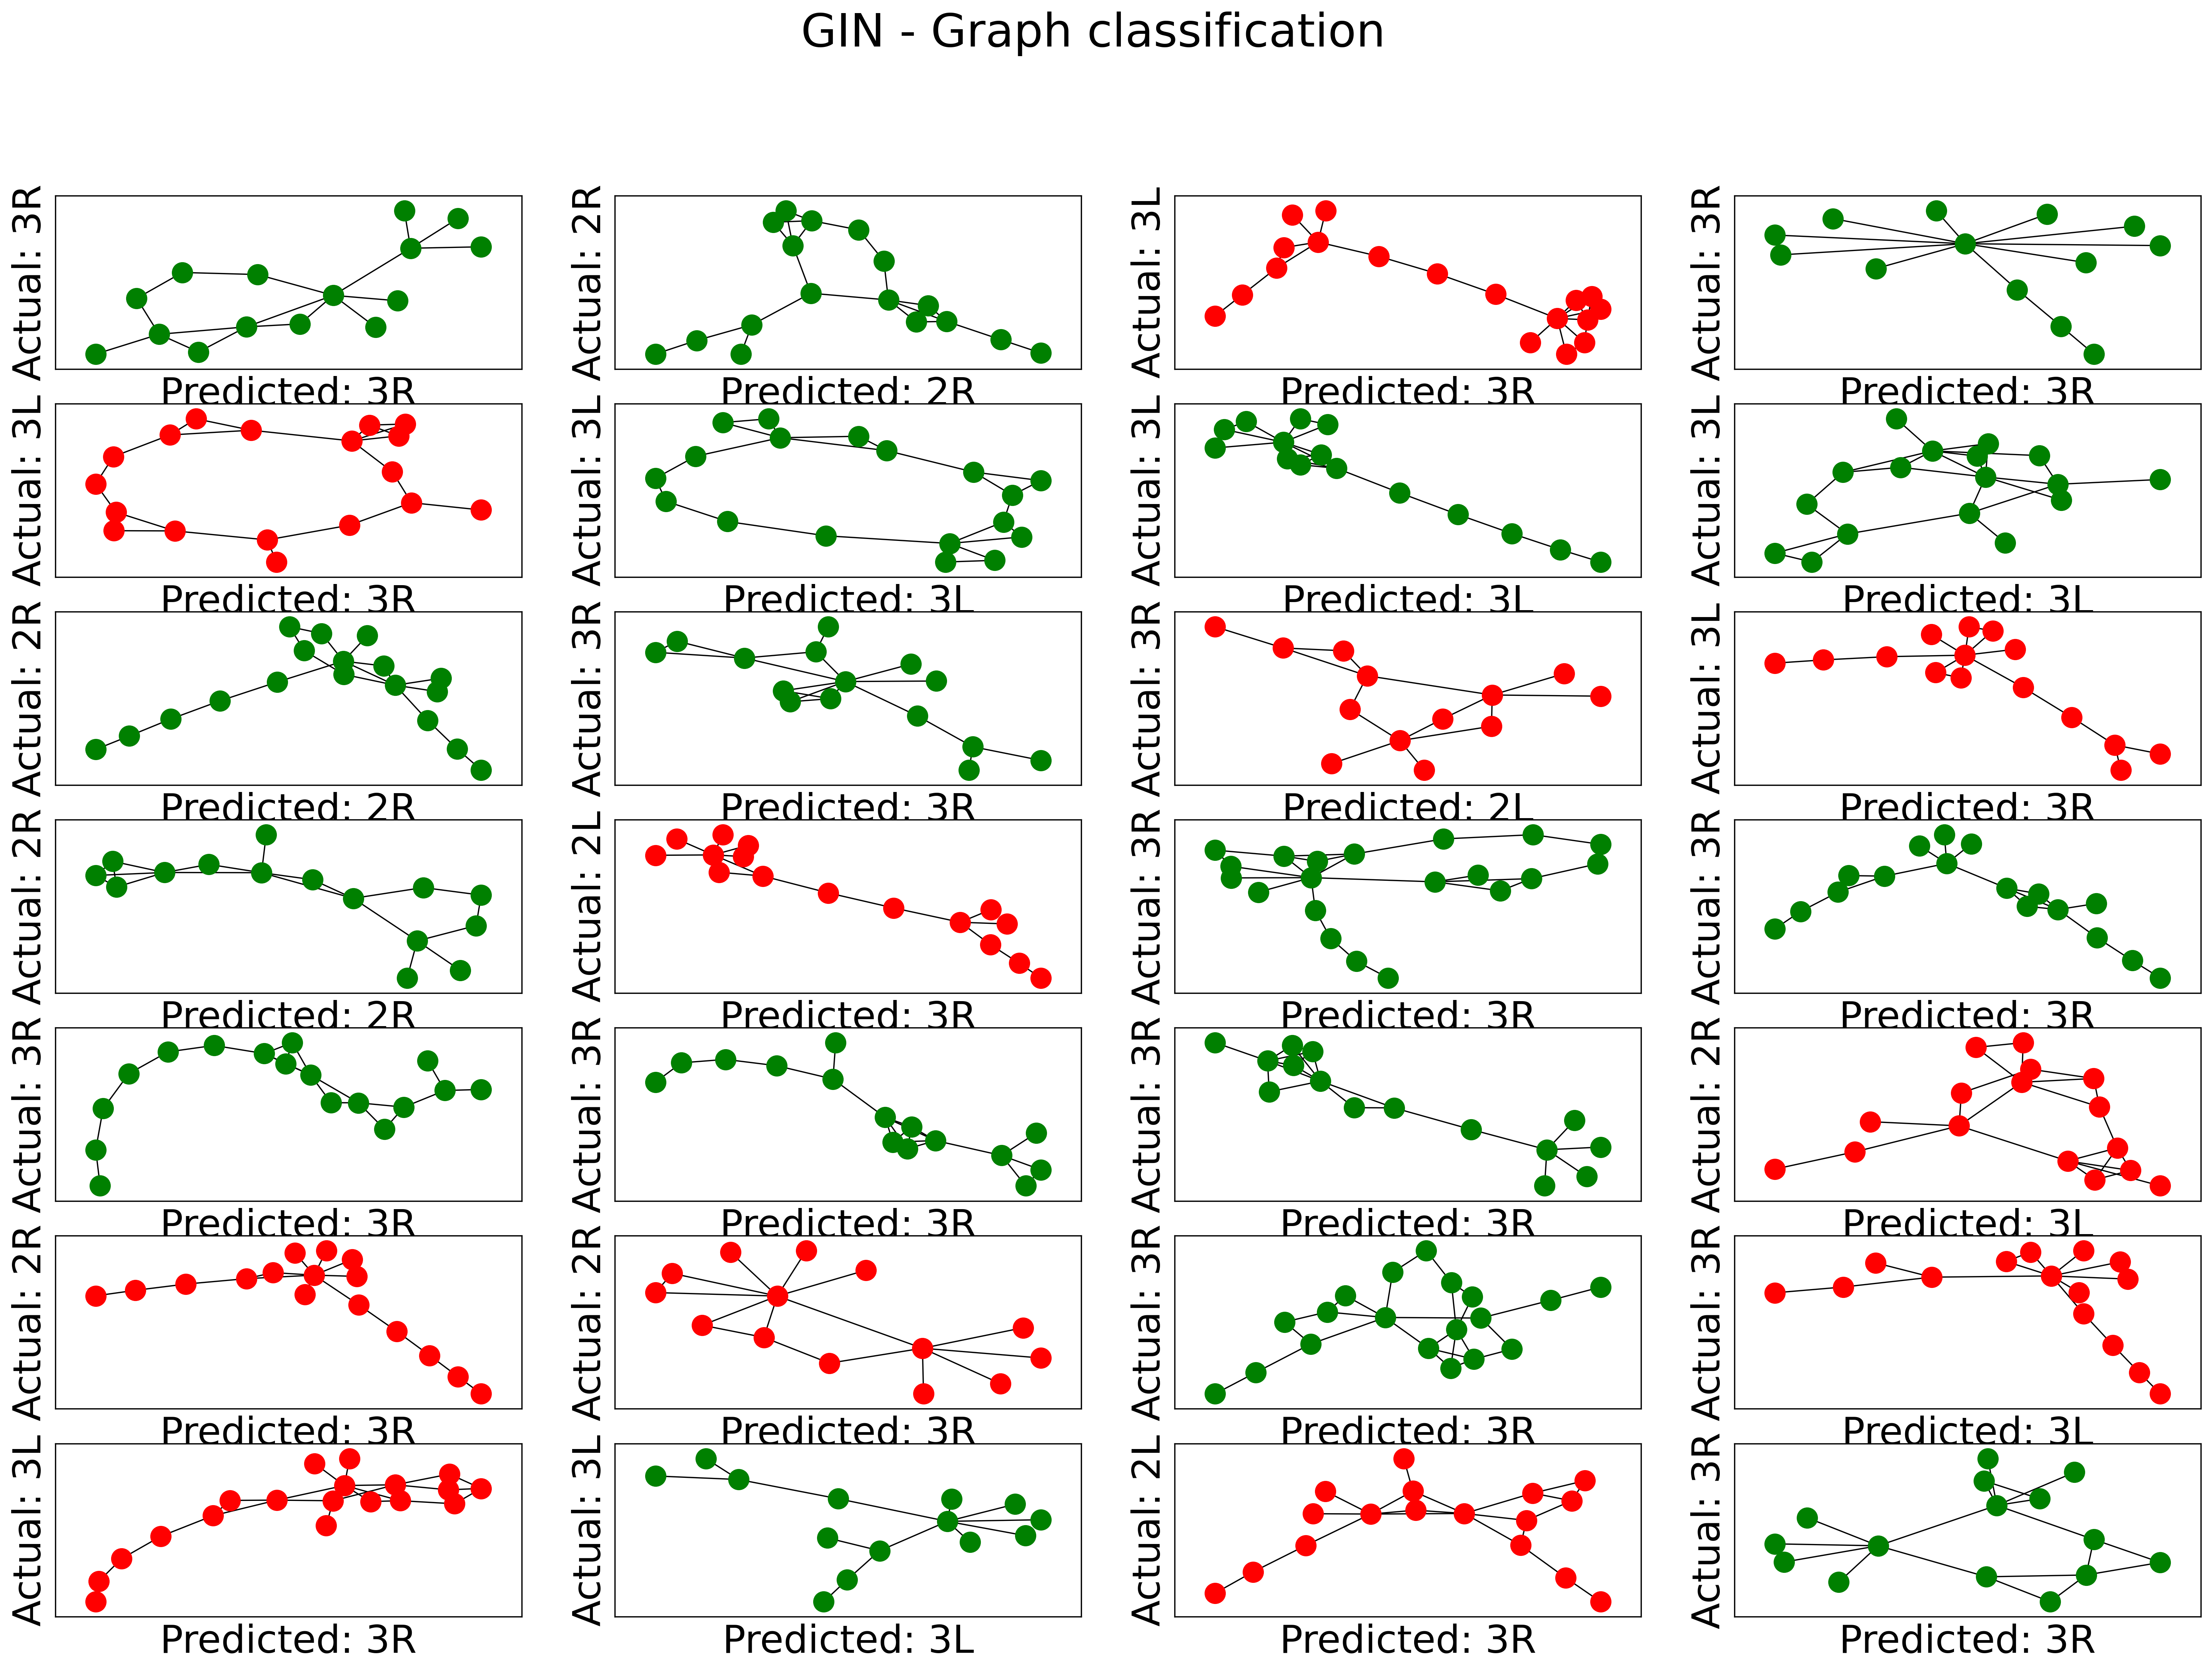

In [72]:
fig, ax = plt.subplots(7, 4, figsize=(24,16))
fig.suptitle('GIN - Graph classification')
lookup = {0: "2L", 1: "2R", 2: "3L", 3: "3R"}

for i, data in enumerate(dataset[len(dataset) - 28:len(dataset)]):
    # Calculate color (green if correct, red otherwise)
    _, out = gin(data.x, data.edge_index, data.batch)
    #color = "green" # set default color to green
    #if (out.argmax(dim = 1) != data.y):
    # 2L = 0; 2R = 1; 3L = 2, 3R = 3

    color = "green" if out.argmax(dim=1) == data.y else "red"

    # Plot graph
    ix = np.unravel_index(i, ax.shape)
    predicted = out.argmax(dim = 1).numpy()[0]
    actual = data.y.numpy()[0]
    ax[ix].axis('on')
    ax[ix].set_xlabel("Predicted: " + lookup[predicted])
    ax[ix].set_ylabel("Actual: " + lookup[actual])
    G = to_networkx(dataset[i], to_undirected=True)
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=False,
                    node_size=150,
                    node_color=color,
                    width=0.8,
                    ax=ax[ix]
                    )

In [73]:
#gcn.eval()
gin.eval()
acc_gcn = 0
acc_gin = 0
acc = 0

for data in test_loader:
    # Get classifications
    #_, out_gcn = gcn(data.x, data.edge_index, data.batch)
    _, out_gin = gin(data.x, data.edge_index, data.batch)
    out = out_gin

    # Calculate accuracy scores
    #acc_gcn += accuracy(out_gcn.argmax(dim=1), data.y) / len(test_loader)
    acc_gin += accuracy(out_gin.argmax(dim=1), data.y) / len(test_loader)
    acc += accuracy(out.argmax(dim=1), data.y) / len(test_loader)

# Print results
#print(f'GCN accuracy:     {acc_gcn*100:.2f}%')
print(f'GIN accuracy:     {acc_gin*100:.2f}%')
#print(f'GCN+GIN accuracy: {acc*100:.2f}%')

GIN accuracy:     56.16%


In [ ]:
#placeholder logics

import torch
from torch_geometric.data import Data, InMemoryDataset
from torch_geometric.utils import from_scipy_sparse_matrix
import scipy.sparse as sp
import numpy as np

class MyCustomDataset(InMemoryDataset):
    def __init__(self, data_list, transform=None, pre_transform=None):
        self.data_list = data_list
        super(MyCustomDataset, self).__init__(None, transform, pre_transform)
        self.data, self.slices = self.collate(data_list)

    @property
    def raw_file_names(self):
        return []

    @property
    def processed_file_names(self):
        return []

    def download(self):
        pass

    def process(self):
        pass

    def len(self):
        return len(self.data_list)

    def get(self, idx):
        return self.data_list[idx]


dataset = []
y = torch.ones_like(placeholder_dataset[0].y.long())

for graph in adjacency_matrix:
    sample = graph.reshape(21, 21)
    node_indices = torch.arange(sample.shape[0], dtype=torch.float).view(-1, 1)
    x = node_indices
    adj_matrix = sp.coo_matrix(sample)
    edge_index, edge_attr = from_scipy_sparse_matrix(adj_matrix)
    data = Data(x=x, edge_index=edge_index, y=torch.tensor(y, dtype=torch.float))
    dataset.append(data)

dataset = MyCustomDataset(dataset)

# Example: Accessing the first graph in the custom dataset
print(dataset[0])
print("Node feature matrix (x):")
print(dataset[0].x)
print("Edge index:")
print(dataset[0].edge_index)
print("Labels (y):")
print(dataset[0].y)
print(len(dataset))

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_scipy_sparse_matrix
import scipy.sparse as sp
from torch_geometric.datasets import TUDataset
# ex) x = [2,1000]
dataset = [] #should not use numpy list
y = np.ones((4,))
for graph in adjacency_matrix:
  sample = graph.reshape(21,21)
  node_indices = torch.arange(sample.shape[0], dtype = torch.float)
  x = torch.cat([node_indices])
  adj_matrix = sp.coo_matrix(sample)
  edge_index, edge_attr = from_scipy_sparse_matrix(adj_matrix)
  data = Data(x = x, edge_index = edge_index,y=y)
  dataset.append(data)
#this is a testing unit